In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calstats as cstat
import seaborn as sns

%matplotlib inline

import matplotlib
font = {'family':'IPAGothic'}
matplotlib.rc('font', **font)

In [2]:
cwd = os.getcwd()
os.chdir('data')
os.chdir('hitter')

In [7]:
data = []
for p in os.listdir():
    df = pd.read_csv(p,index_col=0)
    df['date'] = pd.to_datetime(df['date'])
    df['pa'] = 1
    df = df.groupby('date').sum().cumsum()
    df = cstat.calclate_ratio_index(df)
    data.append({
            'name':p,
            'dataframe':df
                })

In [36]:
data[0]['dataframe'].columns

Index(['at_bats', 'bant', 'k', 'triple', 'sac_fly', 'single', 'double', 'bb',
       'hr', 'pa', 'hit', 'bases', 'ab', 'AVG', 'OBP', 'SLG', 'OPS', 'IsoD',
       'IsoP', 'BABIP', 'XR', 'XR27'],
      dtype='object')

name=丸佳浩.csv
name=坂本勇人.csv
name=ビシエド.csv
name=山田哲人.csv
name=村田修一.csv


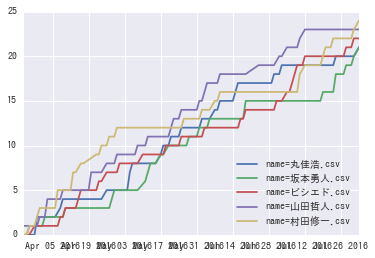

In [46]:
stats = 'double'
data.sort(key=lambda d:d['dataframe'][stats].tail(1).values[0])

for i,d in enumerate(data[-5::]):
    print(d['name'])
    df = d['dataframe']
    plt.plot(df.index,df[stats],label=d['name'])
plt.legend(loc=4)